In [1]:
%pylab inline

from tools.issag import Sampler, _random_range_, _rejection_
from tools.issag import Models, iSSAG
import pandas as pd
import seaborn as sns
from scipy.stats import norm

sns.set(style="ticks")
np.random.seed(sum(map(ord, "axis_grids")))

Populating the interactive namespace from numpy and matplotlib


In [2]:
# chen = Sampler()

# sample = chen.get_samples(size=100)
# sample = chen.get_samples(size=500, pristine=True)
# sample.insert(loc=2, column="tau", value=1.0/sample.gamma*1e9)
# columns = "t_form tau t_trun tau_trun t_burst t_ext".split()
# sample[columns] = sample[columns].apply(log10)
# sample.head(n=10)

# g = sns.PairGrid(sample, vars=["t_form", "tau", "t_trun", "tau_trun", "t_burst", "t_ext"], diag_sharey=False, dropna=False)
# g.map_upper(plt.scatter, **{"s": 7, "lw": 0})
# g.map_lower(sns.kdeplot, cmap="Blues_d", **{"griddsize": 20, "bw": (0.1, 0.1)})
# g.map_diag(sns.kdeplot, lw=2, legend=False)

In [3]:
library = iSSAG(size=10)
library.set_all_SFHs()
library.sample

,t_form,gamma,truncated,t_trun,tau_trun,t_burst,t_ext,A,Z,tau_V,mu_V,sigma_v
0,5.028733e+09,0.611759,True,2.032952e+09,1.045759e+08,2.930754e+09,1.687042e+08,0.081698,1.865246,1.460689,0.789660,251.639621
1,1.310506e+10,0.412182,True,3.355146e+09,1.438020e+07,6.998029e+09,7.874934e+07,0.255682,2.103486,0.338537,0.699786,209.293995
2,5.196083e+09,0.936435,True,5.839478e+09,8.649891e+08,2.690942e+09,1.175558e+08,0.955252,1.290431,0.888650,0.148503,101.939134
3,4.613613e+09,0.049896,False,NaN,NaN,2.680927e+09,2.916829e+08,0.093234,0.687620,2.234097,0.232801,97.742457
4,4.714184e+09,0.642966,False,NaN,NaN,3.082886e+09,1.058405e+08,0.288244,1.366275,1.776811,0.448628,76.748814
5,5.158691e+09,0.948019,True,8.323332e+09,7.846785e+07,3.647506e+09,1.461907e+08,2.842866,0.696512,2.345985,0.717351,334.832722
6,4.946948e+09,0.509188,False,NaN,NaN,2.916416e+09,1.003078e+08,0.357341,1.318360,1.597073,0.101139,90.309998
7,4.801858e+09,0.288338,False,NaN,NaN,3.202844e+09,6.071585e+07,0.533671,1.868838,2.710171,0.393988,98.266542
8,3.742214e+09,0.387118,False,NaN,NaN,2.276698e+09,1.812202e+08,2.901608,0.520152,1.996553,0.317710,324.654019
9,6.763386e+09,0.331318,False,NaN,NaN,3.872629e+09,6.201661e+07,0.103524,1.661341,1.005684,0.215612,382.608067


---------------------------
1000000.0    5.828455e-10
2000000.0    5.884456e-10
3000000.0    5.940996e-10
4000000.0    5.998079e-10
5000000.0    6.055710e-10
Name: 0, dtype: float64
---------------------------
1000000.0    9.049007e-104
2000000.0    9.700671e-104
3000000.0    1.039926e-103
4000000.0    1.114817e-103
5000000.0    1.195100e-103
Name: 1, dtype: float64
---------------------------
1000000.0    0.002139
2000000.0    0.002142
3000000.0    0.002144
4000000.0    0.002147
5000000.0    0.002149
Name: 2, dtype: float64
---------------------------
1000000.0    0.794414
2000000.0    0.794454
3000000.0    0.794493
4000000.0    0.794533
5000000.0    0.794573
Name: 3, dtype: float64
---------------------------
1000000.0    0.048295
2000000.0    0.048327
3000000.0    0.048358
4000000.0    0.048389
5000000.0    0.048420
Name: 4, dtype: float64
---------------------------
1000000.0    1.743790e-45
2000000.0    1.766155e-45
3000000.0    1.788808e-45
4000000.0    1.811750e-45
5000000.0    

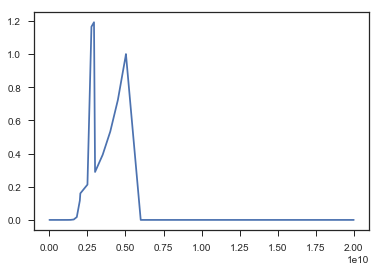

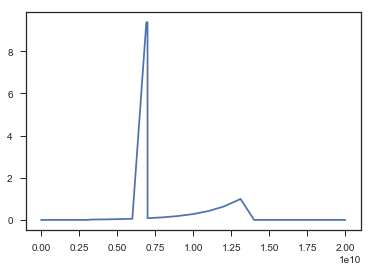

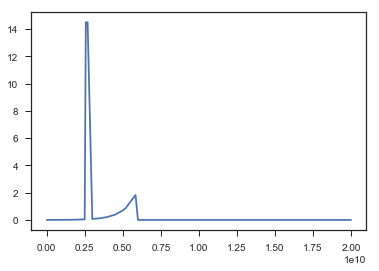

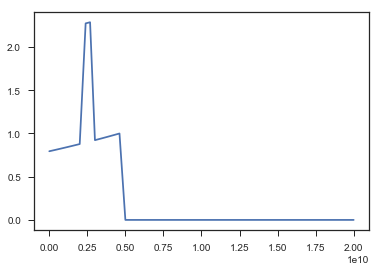

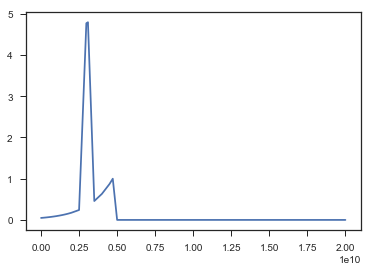

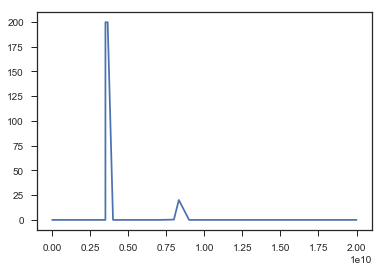

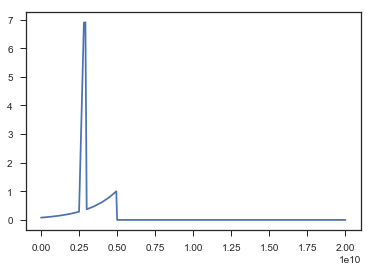

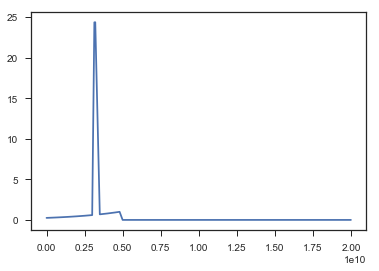

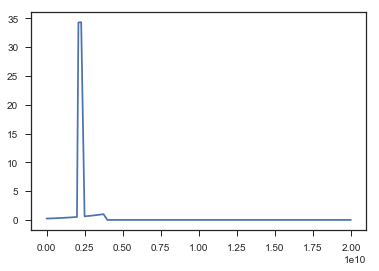

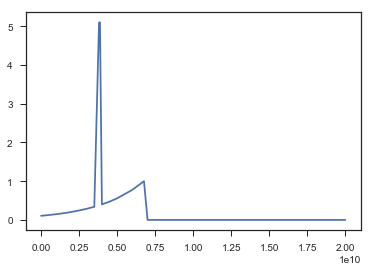

In [4]:
for i in xrange(len(library.SFHs)):
    mask = np.ones(library.SFHs[i].size, dtype=bool)#library.SFHs[i]>0.0#
    print "---------------------------"
    print library.SFHs[i][mask].head()
    figure()
    library.SFHs[i][mask].plot()